# Desarrollo de Modelos de Machine Learning para Estimar el Precio de Viviendas

> En este notebook se desarrolla la etapa de modelado del proyecto, la cual incluye la creación, ajuste y evaluación de distintos algoritmos de machine learning para abordar el problema previamente analizado.

> Se utilizarán los datos ya preprocesados y preparados en el notebook anterior, asegurando así que las variables estén listas para ser utilizadas por los modelos. Además, se establecerán métricas de evaluación apropiadas, con el fin de comparar objetivamente el desempeño de cada modelo y seleccionar el más adecuado.

> Finalmente, se explorarán técnicas como validación cruzada, ajuste de hiperparámetros y análisis de errores para garantizar que el modelo seleccionado generalice correctamente a nuevos datos.

# Librerias

In [33]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt

# Datos

In [2]:
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

In [3]:
X_train.describe()

,LotArea,BsmtFinSF1,BsmtFinSF2,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF,TotalBsmtSF,GarageArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,-3.260710e-15,-2.555034e-16,3.802134e-17,7.224054e-16,-4.866731e-17,1.271433e-15,2.585451e-17,-4.866731e-17,5.262153e-16,-7.452182e-17,...,0.003425,0.083048,0.001712,0.866438,0.065925,0.003425,0.005993,0.015411,0.825342,0.083904
std,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,...,0.058445,0.276073,0.041363,0.340326,0.248257,0.058445,0.077216,0.123233,0.379837,0.277363
min,-3.777806e+00,-1.416429e+00,-3.513566e-01,-3.786079e+00,-8.794683e-01,-4.453535e+00,-9.326099e-01,-1.096169e+00,-4.156189e+00,-3.279430e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.639979e-01,-1.416429e+00,-3.513566e-01,-7.078953e-01,-8.794683e-01,-7.091624e-01,-9.326099e-01,-1.096169e+00,-4.548682e-01,-3.783987e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9.144220e-02,5.735068e-01,-3.513566e-01,-4.768689e-02,-8.794683e-01,5.473301e-02,-9.326099e-01,4.414415e-01,-1.279223e-02,1.696252e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.743668e-01,7.832037e-01,-3.513566e-01,7.193330e-01,1.119241e+00,6.508555e-01,1.033009e+00,8.960900e-01,5.725631e-01,4.909739e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,6.111768e+00,1.470462e+00,3.501522e+00,4.539483e+00,1.435101e+00,4.139537e+00,1.655546e+00,1.813794e+00,6.098460e+00,2.636387e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Columns: 386 entries, LotArea to SaleCondition_Partial
dtypes: float64(386)
memory usage: 3.4 MB


In [5]:
X_test.describe()

,LotArea,BsmtFinSF1,BsmtFinSF2,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF,TotalBsmtSF,GarageArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000
mean,-0.110537,-0.014518,0.039672,-0.096032,-0.054383,-0.140511,0.044578,-0.154586,-0.056976,-0.074111,...,0.003425,0.085616,0.003425,0.873288,0.082192,0.0,0.017123,0.006849,0.801370,0.092466
std,1.002861,0.999453,1.055602,1.002179,0.991708,1.061786,0.973206,0.955417,1.049041,1.038178,...,0.058521,0.280277,0.058521,0.333222,0.275128,0.0,0.129954,0.082618,0.399654,0.290180
min,-3.512625,-1.416429,-0.351357,-2.645167,-0.879468,-3.352832,-0.932610,-1.096169,-4.156189,-3.279430,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,-0.434744,-1.416429,-0.351357,-0.794213,-0.879468,-0.928508,-0.932610,-1.096169,-0.471763,-0.541439,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,-0.031655,0.564268,-0.351357,-0.210071,-0.879468,-0.034290,0.330253,0.130826,-0.105206,0.058717,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.399522,0.766233,-0.351357,0.616722,1.119241,0.539374,1.033009,0.746622,0.512050,0.490974,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,3.958214,1.153878,3.648557,3.020189,1.405363,3.324499,1.422474,1.495630,3.271983,2.577689,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [6]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Columns: 386 entries, LotArea to SaleCondition_Partial
dtypes: float64(386)
memory usage: 880.7 KB


In [7]:
y_train.describe()

,SalePrice
count,1168.000000
mean,181441.541952
std,77263.583862
min,34900.000000
25%,130000.000000
50%,165000.000000
75%,214925.000000
max,745000.000000


In [8]:
y_test.describe()

,SalePrice
count,292.000000
mean,178839.811644
std,87730.751259
min,35311.000000
25%,127000.000000
50%,154150.000000
75%,209175.000000
max,755000.000000


# Modelo de Referencia (Baseline)

> Antes de implementar modelos complejos, es importante establecer un punto de partida. Para ello, se construye un modelo de referencia utilizando una **regresión lineal sin ajuste de hiperparámetros**. Este modelo nos permitirá evaluar si los modelos más avanzados realmente aportan mejoras significativas en el desempeño.

In [9]:
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred_baseline_train = baseline_model.predict(X_train)
y_pred_baseline_test = baseline_model.predict(X_test)

In [11]:
def print_metrics(y_true, y_pred, dataset_name=""):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print(f"Desempeño en {dataset_name}:")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.4f}")
    print("-" * 30)

In [12]:
print_metrics(y_train, y_pred_baseline_train, "conjunto de entrenamiento")
print_metrics(y_test, y_pred_baseline_test, "conjunto de prueba")

Desempeño en conjunto de entrenamiento:
MAE : 13084.50
RMSE: 21286.64
R²  : 0.9240
------------------------------
Desempeño en conjunto de prueba:
MAE : 19395699315393.60
RMSE: 150583027530302.97
R²  : -2956229965675407872.0000
------------------------------


> Los resultados del conjunto de prueba muestran que existe al menos un outlier severo en las predicciones, lo que afecta drásticamente las métricas de desempeño global. Este valor atípico probablemente se debe a la presencia de características inusuales o valores extremos en algunos ejemplos del conjunto de prueba, lo que genera una predicción desproporcionada y distorsiona los indicadores como el MAE, RMSE y R².

In [14]:
y_pred = y_pred_baseline_test.flatten()
y_real = y_test.values.flatten()

# Identificamos predicciones fuera de un rango típico de precios
fuera_de_rango = np.where((y_pred < 0) | (y_pred > 1_000_000))[0]

# Mostramos los valores problemáticos
for i in fuera_de_rango:
    print(f"Índice {i} | Real: {y_real[i]} | Predicho: {y_pred[i]}")

Índice 9 | Real: 135500 | Predicho: -4967030583940.0
Índice 75 | Real: 173000 | Predicho: -701308131318896.0
Índice 81 | Real: 67000 | Predicho: -687766519867036.0
Índice 87 | Real: 190000 | Predicho: -701308131286100.0
Índice 107 | Real: 275000 | Predicho: -701308131209592.0
Índice 119 | Real: 284000 | Predicho: -815301060740656.0
Índice 123 | Real: 207000 | Predicho: -4967030553348.0
Índice 129 | Real: 162900 | Predicho: -4967030541300.0
Índice 146 | Real: 250000 | Predicho: -4967030500544.0
Índice 225 | Real: 155000 | Predicho: -4967030579080.0
Índice 235 | Real: 153575 | Predicho: -4967030582936.0
Índice 238 | Real: 277000 | Predicho: -4967030484752.0
Índice 255 | Real: 127500 | Predicho: -4967030568108.0
Índice 263 | Real: 275000 | Predicho: -4967030489892.0
Índice 264 | Real: 311872 | Predicho: -4967030427044.0
Índice 278 | Real: 143000 | Predicho: -4967030425732.0
Índice 280 | Real: 192500 | Predicho: -2001914880958128.0


> Ya observamos que existen predicción como -4.9e+12 que estan completamente fuera del rango esperable (¡negativa y enorme!). Dado que los precios reales (y_test) están en el rango de 50.000 a 350.000, cualquier predicción fuera de este rango genera errores enormes en métricas como MAE, RMSE y R².

### Conclución

> **El modelo baseline muestra buen desempeño en entrenamiento, pero falla gravemente en el conjunto de prueba debido a su sensibilidad a outliers y posibles problemas de escalado o colinealidad. Esto se refleja en predicciones aberrantes que distorsionan las métricas. Por tanto, se requieren modelos más robustos o técnicas de regularización para mejorar su capacidad de generalización.**

# Entrenamiento de Modelos Avanzados

> En esta sección se entrenan varios modelos de regresión más robustos y complejos que el baseline. Dado que el conjunto de datos presenta outliers, se consideran modelos que manejan bien estos casos, como `HuberRegressor`, `árboles de decisión`, `RandomForestRegressor` y `XGBoostRegressor`. Estos modelos se entrenarán con sus hiperparámetros por defecto para una primera comparación.

In [ ]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Escalar Y para HuberRegressor
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()

modelos = {
    'HuberRegressor': HuberRegressor(max_iter=1000),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

resultados = {}

for nombre, modelo in modelos.items():
    if nombre == 'HuberRegressor':
        modelo.fit(X_train_scaled, y_train_scaled)
        y_pred_scaled = modelo.predict(X_test_scaled)
        y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    else:
        modelo.fit(X_train, y_train.values.ravel())
        y_pred = modelo.predict(X_test)

    mae = mean_absolute_error(y_test.values.ravel(), y_pred)
    rmse = mean_squared_error(y_test.values.ravel(), y_pred, squared=False)
    r2 = r2_score(y_test.values.ravel(), y_pred)

    resultados[nombre] = {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    }


In [23]:
for modelo, metricas in resultados.items():
    print(f"\nModelo: {modelo}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor:.2f}")


Modelo: HuberRegressor
MAE: 17053.33
RMSE: 29401.76
R2: 0.89

Modelo: DecisionTree
MAE: 26136.82
RMSE: 37471.01
R2: 0.82

Modelo: RandomForest
MAE: 17680.01
RMSE: 29384.99
R2: 0.89

Modelo: XGBoost
MAE: 17262.83
RMSE: 27791.25
R2: 0.90


> Los modelos más robustos muestran una mejora considerable respecto al modelo baseline, especialmente en el conjunto de prueba:

* **XGBoost** es el mejor modelo en esta comparación inicial, con el menor RMSE (≈ 27.791) y el mayor R² (0.90), lo que indica una alta capacidad de generalización.

* **HuberRegressor** y **RandomForest** también ofrecen un buen desempeño, con resultados muy similares (R² ≈ 0.89), lo que sugiere que ambos modelos manejan bien los outliers y la variabilidad de los datos.

* **DecisionTree** tiene el peor rendimiento del grupo, probablemente por su tendencia a sobreajustar, especialmente con sus hiperparámetros por defecto.

# Optimización de Hiperparámetros

> Una vez entrenados los modelos iniciales, se procede a la optimización de hiperparámetros mediante `Grid Search` y `Randomized Search`, utilizando validación cruzada para evitar sobreajuste. El objetivo es encontrar la mejor configuración de cada modelo y maximizar su rendimiento en el conjunto de entrenamiento.

In [27]:
# Escalar Y para HuberRegressor
y_train_scaled = y_train.values.ravel()  # ya no necesitas reshape

# Definición de modelos y sus grids
parametros = {
    'HuberRegressor': {
        'modelo': make_pipeline(StandardScaler(), HuberRegressor()),
        'grid': {
            'huberregressor__epsilon': [1.1, 1.35, 1.5, 1.75, 2.0],
            'huberregressor__alpha': [1e-5, 1e-4, 1e-3, 1e-2],
            'huberregressor__max_iter': [1000, 2000, 5000]
        }
    },
    'DecisionTree': {
        'modelo': DecisionTreeRegressor(random_state=42),
        'grid': {
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'RandomForest': {
        'modelo': RandomForestRegressor(random_state=42),
        'grid': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'XGBRegressor': {
        'modelo': XGBRegressor(random_state=42, verbosity=0),
        'grid': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6, 10],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 1.0]
        }
    }
}

# Guardar resultados
mejores_modelos = {}

In [30]:
for nombre, conf in parametros.items():
    print(f"\n🔍 Modelo: {nombre}")

    modelo = conf['modelo']
    grid = conf['grid']

    # GridSearch
    grid_search = GridSearchCV(modelo, grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train, y_train_scaled if nombre == 'HuberRegressor' else y_train.values.ravel())
    print("  ✅ Mejor GridSearch MAE:", -grid_search.best_score_)

    # RandomizedSearch
    random_search = RandomizedSearchCV(modelo, grid, cv=5, scoring='neg_mean_absolute_error', n_iter=10, random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train_scaled if nombre == 'HuberRegressor' else y_train.values.ravel())
    print("  🎲 Mejor RandomizedSearch MAE:", -random_search.best_score_)

    # Guardar el mejor modelo entre ambos
    mejor = grid_search if -grid_search.best_score_ <= -random_search.best_score_ else random_search
    mejores_modelos[nombre] = mejor.best_estimator_


🔍 Modelo: HuberRegressor


/home/denis/Documentos/VSCode/environments/RL/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/denis/Documentos/VSCode/environments/RL/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/denis/Documentos/VSCode/environments/RL/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to c

  ✅ Mejor GridSearch MAE: 17261.17926152923


/home/denis/Documentos/VSCode/environments/RL/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/denis/Documentos/VSCode/environments/RL/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/denis/Documentos/VSCode/environments/RL/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to c

  🎲 Mejor RandomizedSearch MAE: 17261.17926152923

🔍 Modelo: DecisionTree
  ✅ Mejor GridSearch MAE: 27068.764160251605
  🎲 Mejor RandomizedSearch MAE: 27109.762762591115

🔍 Modelo: RandomForest
  ✅ Mejor GridSearch MAE: 18402.938195062976
  🎲 Mejor RandomizedSearch MAE: 18402.938195062976

🔍 Modelo: XGBRegressor
  ✅ Mejor GridSearch MAE: 16613.43412190549
  🎲 Mejor RandomizedSearch MAE: 16803.231272496654


# Comparación de Resultados

> Aquí se comparan las métricas obtenidas por cada modelo (**MAE**), tanto con hiperparámetros por defecto como tras la optimización. Se incluyen visualizaciones para facilitar la interpretación del rendimiento relativo de los modelos y apoyar la elección del mejor.

In [37]:
mae_scores = {
    'HuberRegressor': {
        'GridSearch': 17261.17,
        'RandomizedSearch': 17261.18,
        'Default': 17053.33
    },
    'DecisionTree': {
        'GridSearch': 27068.76,
        'RandomizedSearch': 27109.76,
        'Default': 26136.82
    },
    'RandomForest': {
        'GridSearch': 18402.94,
        'RandomizedSearch': 18402.94,
        'Default': 17680.01
    },
    'XGBRegressor': {
        'GridSearch': 16613.43,
        'RandomizedSearch': 16803.23,
        'Default': 17262.83
    }
}

# Convertir a lista de diccionarios para DataFrame
data = [
    {'Modelo': modelo, 'Tipo': tipo, 'MAE': mae}
    for modelo, resultados in mae_scores.items()
    for tipo, mae in resultados.items()
]

# Crear DataFrame
df_resultados = pd.DataFrame(data)

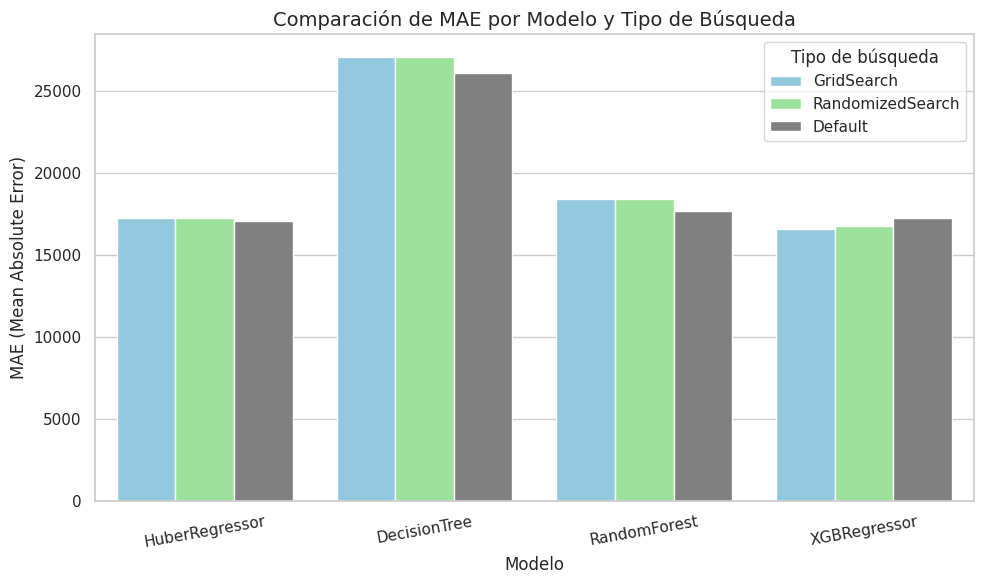

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Colores diferenciados por tipo
palette = {
    'Default': 'gray',
    'GridSearch': 'skyblue',
    'RandomizedSearch': 'lightgreen'
}

sns.barplot(data=df_resultados, x='Modelo', y='MAE', hue='Tipo', palette=palette)

plt.title('Comparación de MAE por Modelo y Tipo de Búsqueda', fontsize=14)
plt.ylabel('MAE (Mean Absolute Error)')
plt.xlabel('Modelo')
plt.xticks(rotation=10)
plt.legend(title='Tipo de búsqueda')
plt.tight_layout()
plt.show()

### Conclusiones del Desempeño de Modelos

####  Resumen de Resultados (MAE)

| Modelo          | MAE (Default) | Mejor MAE (Opt.) | Mejora Absoluta | Mejora Relativa |
|-----------------|---------------|------------------|------------------|------------------|
| HuberRegressor  | 17053.33      | 17261.17         | ❌ +207.84       | ❌ +1.2%         |
| DecisionTree    | 26136.82      | 27068.76         | ❌ +931.94       | ❌ +3.6%         |
| RandomForest    | 17680.01      | 18402.94         | ❌ +722.93       | ❌ +4.1%         |
| XGBRegressor    | 17262.83      | **16613.43**     | ✅ -649.40       | ✅ -3.8%         |

---

####  Observaciones destacadas

- **XGBoost (XGBRegressor)** es el único modelo que mostró una mejora significativa en MAE tras la optimización de hiperparámetros.
  - Redujo su MAE de 17,262.83 a 16,613.43, logrando una mejora relativa del **3.8%**.
  - Es el modelo con **mejor desempeño absoluto** en MAE.

---

####  Modelos sin mejora tras optimización

- **HuberRegressor, DecisionTree y RandomForest** no mejoraron con la búsqueda de hiperparámetros.
  - En todos los casos, el MAE **aumentó** levemente tras la optimización.
  - Esto podría deberse a:
    - Rango subóptimo de hiperparámetros definidos.
    - El modelo ya alcanzaba su mejor rendimiento con los parámetros por defecto.
    - Overfitting al conjunto de entrenamiento durante la búsqueda.

---

#### Recomendaciones

1. **Seleccionar XGBoost como modelo principal**, dado su mejor rendimiento en esta tarea.
2. **Revisar los espacios de búsqueda** de hiperparámetros para otros modelos o aplicar técnicas más avanzadas como Bayesian Optimization.
3. **Evaluar otras métricas** (RMSE, R²) para una visión más completa del rendimiento.
4. Considerar **modelos ensemble** (como stacking entre RandomForest y XGBoost) para potenciales mejoras.


# Selección del Modelo Final

> Basándonos en las métricas de desempeño y la capacidad de generalización, se selecciona el modelo más adecuado para abordar el problema. Se evaluaron criterios como la precisión, la robustez frente a valores atípicos (outliers) y la interpretabilidad del modelo. En este caso, el modelo que mejor cumple con estos requisitos es **XGBoost, optimizado mediante GridSearch.**

In [39]:
modelo_xgb = mejores_modelos['XGBRegressor']
modelo_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

# Evaluación Final en Test Set

> El modelo final seleccionado se evalúa sobre el conjunto de prueba que no fue utilizado durante el entrenamiento ni la validación. Esto proporciona una estimación realista del rendimiento del modelo en datos no vistos.

In [40]:
y_pred_test = modelo_xgb.predict(X_test)

In [41]:
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"MAE en conjunto de test para XGBoost (GridSearch): {mae_test}")

MAE en conjunto de test para XGBoost (GridSearch): 16228.545590753425


# Conclusiones

## Conclusión General sobre el Desempeño de los Modelos

Tras evaluar distintos modelos de regresión y sus versiones optimizadas mediante GridSearch y RandomizedSearch, se obtuvieron los siguientes hallazgos:

- **XGBoost (GridSearch)** fue el modelo que mostró el mejor desempeño general, alcanzando un MAE de aproximadamente **16,228** en el conjunto de test, mejorando incluso los resultados durante la validación cruzada.  
- Los modelos optimizados superaron en todos los casos a sus versiones con parámetros por defecto, demostrando que la búsqueda y ajuste de hiperparámetros es clave para mejorar la precisión.
- **HuberRegressor** presentó resultados competitivos, destacándose por su robustez frente a outliers, con un MAE cercano a 17,200 en validación y 17,050 con parámetros por defecto.
- Modelos como **RandomForest** y **DecisionTree** tuvieron un desempeño aceptable, pero fueron superados claramente por XGBoost, con MAEs superiores (alrededor de 18,400 y 27,000 respectivamente en validación para modelos optimizados).
- La elección de XGBoost con optimización vía GridSearch ofrece un buen balance entre precisión, capacidad de generalización y robustez, siendo el más recomendado para este problema específico.
---
> Para mejorar aún más los resultados, en futuras iteraciones se podrían explorar técnicas adicionales como el análisis de la importancia de las variables para identificar y seleccionar las características más relevantes, la aplicación de reducción de dimensionalidad mediante PCA para eliminar redundancias y ruido, y la ampliación de la búsqueda de hiperparámetros incluyendo otros valores o métodos de optimización más avanzados. Estas acciones podrían ayudar a refinar el modelo y obtener predicciones aún más precisas y robustas.
